## Parking Space EDA
This notebook is to perform some EDA and explore the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
parking_df = pd.read_excel('parking.xls')
parking_df.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [3]:
parking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9060 entries, 0 to 9059
Data columns (total 6 columns):
Bldg City               9060 non-null object
Bldg State              9060 non-null object
Bldg Status             9060 non-null object
Property Type           9060 non-null object
Total Parking Spaces    9060 non-null int64
Owned/Leased            9060 non-null object
dtypes: int64(1), object(5)
memory usage: 424.8+ KB


In [9]:
df_cat = parking_df[['Bldg State','Bldg Status','Property Type','Owned/Leased']].copy()

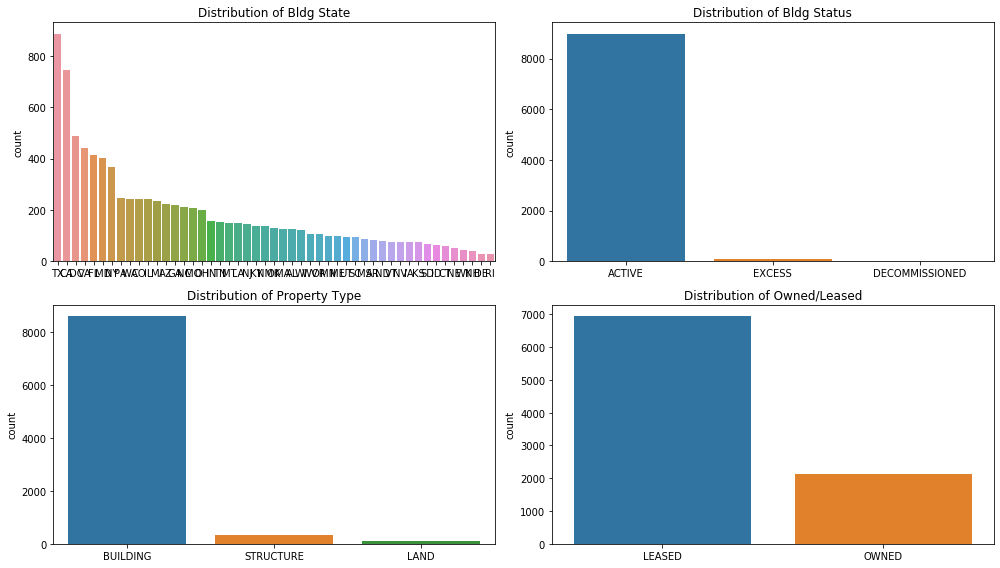

In [10]:
fig = plt.figure(1, (14, 8))

for i,cat in enumerate(df_cat.columns):
    ax = plt.subplot(2,2,i+1)
    sns.countplot(df_cat[cat], order=df_cat[cat].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {cat}')
    plt.tight_layout()

plt.show()

In [15]:
pd.pivot_table(parking_df,index='Owned/Leased',values='Total Parking Spaces',aggfunc='count')

,Total Parking Spaces
Owned/Leased,
LEASED,6940
OWNED,2120


In [16]:
pd.pivot_table(parking_df,index='Property Type',values='Total Parking Spaces',aggfunc='count')

,Total Parking Spaces
Property Type,
BUILDING,8602
LAND,119
STRUCTURE,339


In [18]:
bldg_status = pd.pivot_table(parking_df,index='Bldg Status',values='Total Parking Spaces',aggfunc='count')

<BarContainer object of 3 artists>

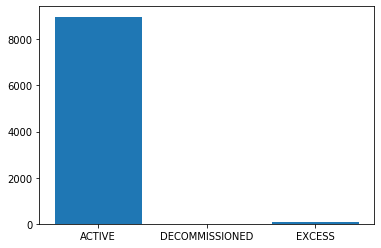

In [19]:
plt.bar(bldg_status.index,bldg_status['Total Parking Spaces'])

#### In which building state parking situation is in excess, put it in order.

In [24]:
excess_parking = pd.pivot_table(parking_df,index='Bldg State', values='Total Parking Spaces',columns='Bldg Status')
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
AR,37.000000,NaN,NaN
AZ,32.256757,NaN,NaN
CA,60.493298,NaN,NaN
CO,78.936709,NaN,22.200000
CT,29.327586,NaN,NaN
DC,41.255144,NaN,NaN
DE,15.750000,NaN,NaN
FL,51.905569,NaN,NaN


In [28]:
excess_parking = excess_parking[excess_parking.EXCESS>0]
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
CO,78.936709,NaN,22.200000
IL,45.000000,NaN,21.000000
LA,43.684932,NaN,68.666667
MD,104.185090,0.000000,43.166667
MO,121.200000,815.333333,254.272727
NE,54.060000,NaN,19.000000
NJ,32.169118,NaN,4.300000
NV,48.648649,NaN,173.000000


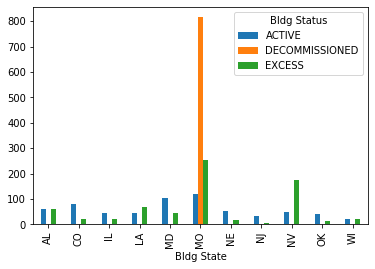

In [29]:
excess_parking.plot(kind='bar')

<BarContainer object of 11 artists>

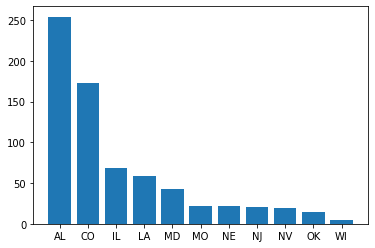

In [31]:
plt.bar(excess_parking.index,excess_parking.EXCESS.sort_values(ascending=False))

#### Bldg cities that have been decomissioned along with total parking

In [34]:
decommisioned_parking = pd.pivot_table(parking_df,index='Bldg City',columns='Bldg Status',values='Total Parking Spaces')
decommisioned_parking = decommisioned_parking[decommisioned_parking.DECOMMISSIONED>0]
decommisioned_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg City,,,
OVERLAND,21.666667,2089.0,NaN
SAINT LOUIS,135.977273,178.5,NaN


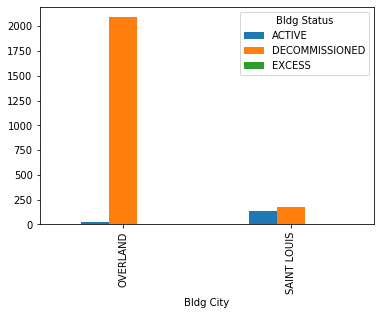

In [36]:
decommisioned_parking.plot(kind='bar')

<BarContainer object of 2 artists>

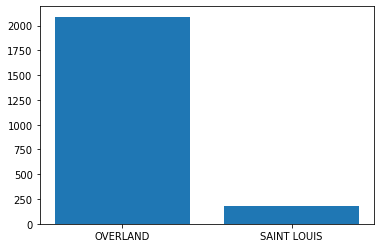

In [37]:
plt.bar(decommisioned_parking.index,decommisioned_parking.DECOMMISSIONED.sort_values(ascending=False))

#### In which type of property parking space is in excess

In [42]:
excess_prop_parking = pd.pivot_table(parking_df[parking_df["Bldg Status"] == 'EXCESS'],index='Property Type',values='Total Parking Spaces')
excess_prop_parking

,Total Parking Spaces
Property Type,
BUILDING,57.791045
STRUCTURE,37.000000


#### Where is more active parking - Owned/Leased

In [45]:
active_parking = pd.pivot_table(parking_df[parking_df["Bldg Status"] == 'ACTIVE'],
                               index = 'Owned/Leased',
                               values='Total Parking Spaces')
active_parking

,Total Parking Spaces
Owned/Leased,
LEASED,44.707349
OWNED,74.365997


Owned parking has more active parking than leased.

In [46]:
active_parking['Total Parking Spaces']/active_parking['Total Parking Spaces'].sum()

Owned/Leased
LEASED    0.375461
OWNED     0.624539
Name: Total Parking Spaces, dtype: float64

In [47]:
active_parking['%Contribution'] = active_parking['Total Parking Spaces']/active_parking['Total Parking Spaces'].sum()
active_parking

,Total Parking Spaces,%Contribution
Owned/Leased,,
LEASED,44.707349,0.375461
OWNED,74.365997,0.624539


#### State with more leased parking (top 5)

In [51]:
state_parking = pd.pivot_table(parking_df[parking_df["Owned/Leased"] == 'LEASED'],index='Bldg State',values='Total Parking Spaces')
state_parking.sort_values(by='Total Parking Spaces',ascending=False).head(5)

,Total Parking Spaces
Bldg State,
MO,107.762821
TX,73.457086
VA,72.476316
AL,64.055556
UT,62.505882


#### Which property type has more active parking.

In [54]:
active_prop_parking = pd.pivot_table(parking_df[parking_df["Bldg Status"] == 'ACTIVE'],
                                     index='Property Type',values='Total Parking Spaces')
active_prop_parking

,Total Parking Spaces
Property Type,
BUILDING,51.134764
LAND,19.268908
STRUCTURE,70.779762


#### How's the distribution of parking in city by property type

In [64]:
active_prop_parking = pd.pivot_table(parking_df, index='Bldg City'
                                     ,columns='Property Type'
                                    ,values='Total Parking Spaces')
active_prop_parking

Property Type,BUILDING,LAND,STRUCTURE
Bldg City,,,
ABERDEEN,35.909091,NaN,NaN
ABILENE,13.333333,NaN,NaN
ABINGDON,6.333333,NaN,NaN
ACCOMAC,25.000000,NaN,NaN
ADA,20.000000,NaN,NaN
...,...,...,...
YUCCA VALLEY,24.000000,NaN,NaN
YUMA,21.357143,NaN,NaN
ZANESVILLE,75.000000,NaN,NaN


#### Building state which has zero parking spaces

In [74]:
zero_state_parking = parking_df[parking_df['Total Parking Spaces'] == 0 ]
zero_state_parking['Bldg State'].unique()

array(['CT', 'MA', 'ME', 'NH', 'RI', 'VT', 'ID', 'OR', 'WA', 'DC', 'MD',
       'VA', 'NJ', 'NY', 'DE', 'PA', 'WV', 'AL', 'FL', 'GA', 'KY', 'MS',
       'NC', 'SC', 'TN', 'IL', 'IN', 'MI', 'MN', 'OH', 'WI', 'IA', 'KS',
       'MO', 'NE', 'AR', 'LA', 'NM', 'OK', 'TX', 'CO', 'MT', 'ND', 'SD',
       'UT', 'WY', 'AZ', 'CA', 'NV'], dtype=object)

#### States with maximum and minimum parking space

In [76]:
parking_df[parking_df['Total Parking Spaces'] == parking_df['Total Parking Spaces'].max()]


,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
8309,LAGUNA NIGUEL,CA,ACTIVE,BUILDING,6198,OWNED


In [80]:
parking_df[parking_df['Total Parking Spaces'] == parking_df['Total Parking Spaces'].min()]


,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
11,EAST HARTFORD,CT,ACTIVE,BUILDING,0,LEASED
31,NEW LONDON,CT,ACTIVE,BUILDING,0,LEASED
35,NEW HAVEN,CT,ACTIVE,BUILDING,0,LEASED
...,...,...,...,...,...,...
9013,ELY,NV,ACTIVE,BUILDING,0,LEASED
9015,ELKO,NV,ACTIVE,BUILDING,0,LEASED
9029,RENO,NV,ACTIVE,BUILDING,0,LEASED
9042,LAS VEGAS,NV,ACTIVE,BUILDING,0,LEASED


In [84]:
min_park= parking_df[(parking_df['Total Parking Spaces'] > 0)]
min_park[(min_park['Total Parking Spaces'] == min_park['Total Parking Spaces'].min())]


,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
10,MIDDLETOWN,CT,ACTIVE,BUILDING,1,LEASED
25,DANBURY,CT,ACTIVE,BUILDING,1,LEASED
44,EAST HARTFORD,CT,ACTIVE,BUILDING,1,LEASED
50,DANBURY,CT,ACTIVE,BUILDING,1,LEASED
77,HANOVER,MA,ACTIVE,BUILDING,1,LEASED
...,...,...,...,...,...,...
8900,REDDING,CA,ACTIVE,BUILDING,1,LEASED
8914,LOS ANGELES,CA,ACTIVE,BUILDING,1,LEASED
8919,LAKEPORT,CA,ACTIVE,BUILDING,1,LEASED
8942,ANTIOCH,CA,ACTIVE,BUILDING,1,LEASED


In [79]:
parking_df.groupby('Bldg State')['Total Parking Spaces'].max().sort_values(ascending=False)

Bldg State
CA    6198
MD    5865
MO    4900
NY    2306
VA    2162
UT    2101
TX    2048
AL    1765
MA    1688
GA    1599
TN    1255
PA    1201
KY    1145
DC    1094
MN    1087
CO    1046
IN    1036
WA     950
MI     920
SC     893
IL     888
MS     820
NE     680
NH     669
LA     640
VT     605
KS     603
OK     596
FL     556
NC     507
OH     503
NM     483
OR     434
AZ     405
NJ     400
NV     393
WY     336
ID     335
AR     326
IA     306
WV     302
MT     287
CT     220
SD     205
ME     182
WI     160
DE     150
ND     143
RI     132
Name: Total Parking Spaces, dtype: int64

CA has maximum and RI has minimum parking space.